### Name: Aniruddha
### Regd No: 22237
### Date: 26/04/2023
### R-Lab: Linear Models for Regresssion
### Assignment 8

### Installing Necessary Packages

### Single Linear Regression on mtcars dataset

In [4]:
# Loading the mtcars dataset
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [10]:
# Fit a simple linear regression model of mpg against Rear axle ratio

model <- lm(mpg ~ drat, data = mtcars)

# here mpg is the response and drat is the predictor

In [11]:
# Printing the summary of the model
summary(model)


Call:
lm(formula = mpg ~ drat, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0775 -2.6803 -0.2095  2.2976  9.0225 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.525      5.477  -1.374     0.18    
drat           7.678      1.507   5.096 1.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.485 on 30 degrees of freedom
Multiple R-squared:  0.464,	Adjusted R-squared:  0.4461 
F-statistic: 25.97 on 1 and 30 DF,  p-value: 1.776e-05


In [8]:
library(ggplot2)

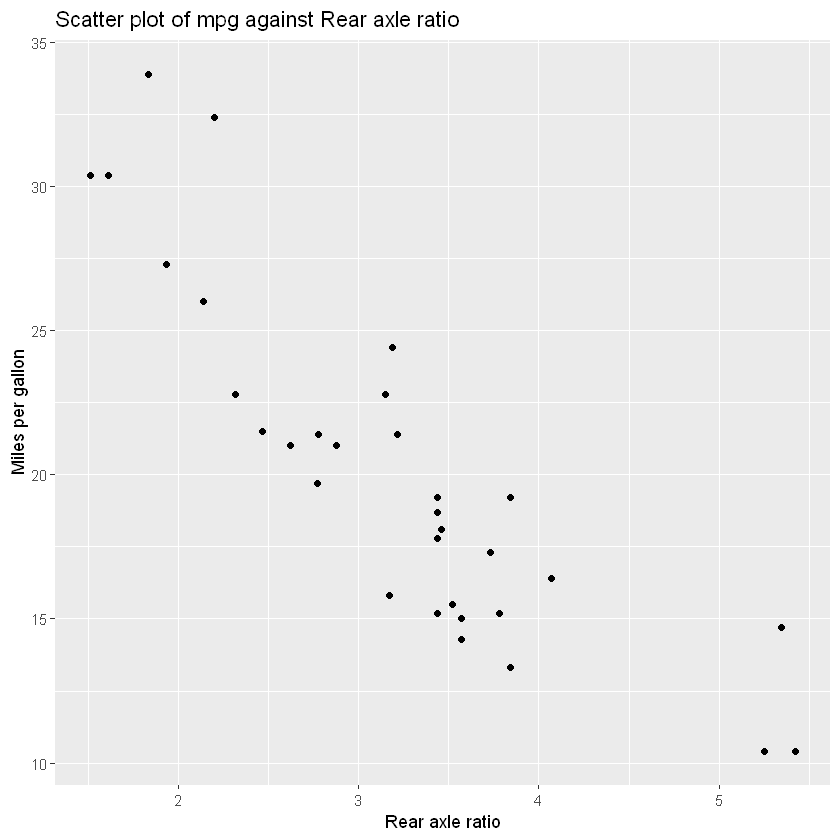

In [12]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  labs(x = "Rear axle ratio", y = "Miles per gallon") +
  ggtitle("Scatter plot of mpg against Rear axle ratio")

### Single Linear Regresssion

`geom_smooth()` using formula = 'y ~ x'


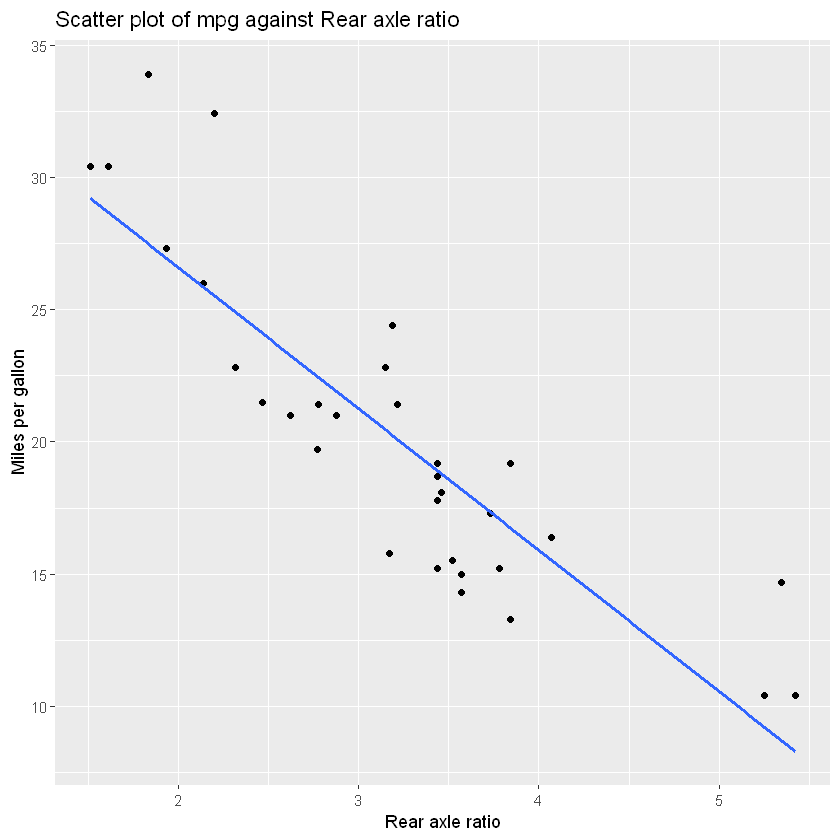

In [118]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  labs(x = "Rear axle ratio", y = "Miles per gallon") +
  ggtitle("Scatter plot of mpg against Rear axle ratio") +
  geom_smooth(method = "lm", se = FALSE)

### Multiple Linear Regression

In [18]:
# Fitting the multiple linear regression model with mpg as the response variable and cyl, drat, hp as the predictors
model_mlr = lm(mpg ~ cyl + hp + drat, data = mtcars)

In [19]:
summary(model_mlr)


Call:
lm(formula = mpg ~ cyl + hp + drat, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2103 -2.0384 -0.0944  1.2891  6.7107 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 22.51406    7.99354   2.817   0.0088 **
cyl         -1.36060    0.73493  -1.851   0.0747 . 
hp          -0.02878    0.01530  -1.881   0.0704 . 
drat         2.84090    1.52208   1.866   0.0725 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.045 on 28 degrees of freedom
Multiple R-squared:  0.7694,	Adjusted R-squared:  0.7447 
F-statistic: 31.14 on 3 and 28 DF,  p-value: 4.616e-09


### Multiple Linear Regression Model

`geom_smooth()` using formula = 'y ~ x'


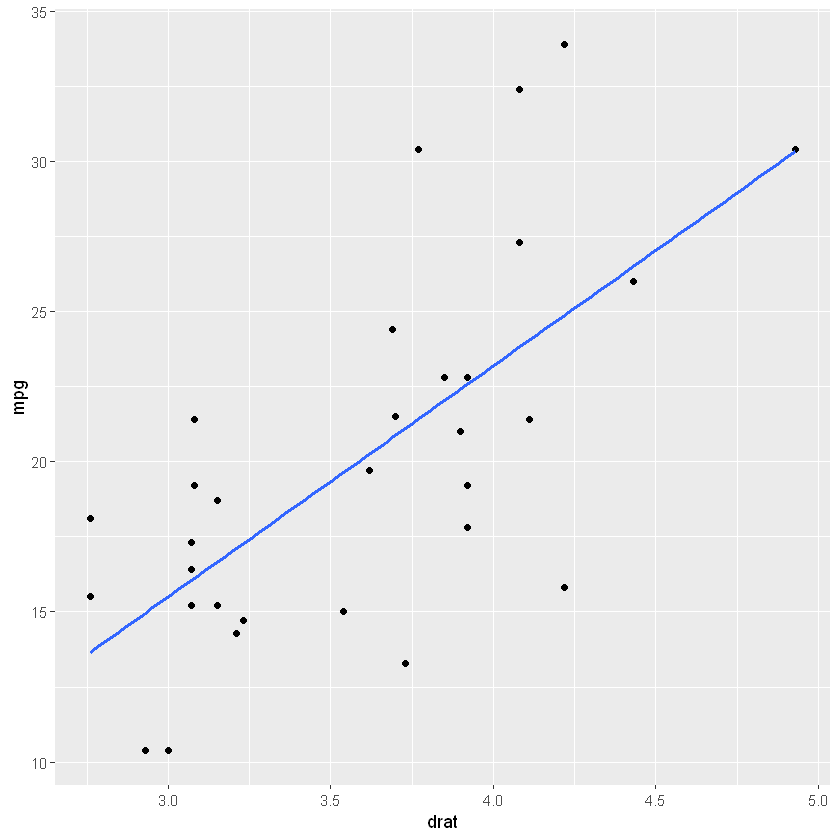

In [20]:
# Create a scatter plot of mpg vs. drat, with a regression line passing through

ggplot(mtcars, aes(x = drat, y = mpg)) +
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


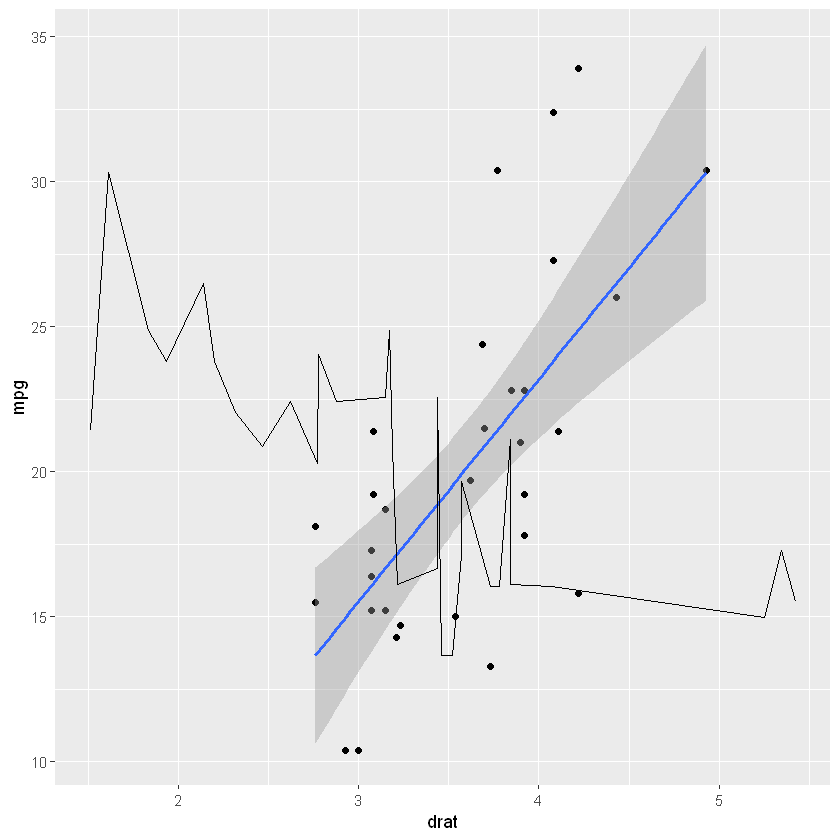

In [24]:
# Add the predicted values from the model to the scatter plot

ggplot(mtcars, aes(x = drat, y = mpg)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = TRUE) +
  geom_line(aes(x = wt, y = predict(model)))

### Logistic Regression

In [34]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [35]:
data(mtcars)

In [38]:
# Converting the disp variable to a factor
mtcars$disp <- as.factor(mtcars$disp)

In [51]:
# Fit a logistic regression model with am as the response variable
model_logit <- glm(am ~ gear + hp, data = mtcars, family = binomial(link = "logit"))

In [52]:
summary(model_logit) # model summary


Call:
glm(formula = am ~ gear + hp, family = binomial(link = "logit"), 
    data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8902   0.0000   0.0000   0.1321   1.1040  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -9.473e+01  1.866e+04  -0.005    0.996
gear         2.454e+01  4.665e+03   0.005    0.996
hp          -2.975e-02  2.779e-02  -1.070    0.284

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.23  on 31  degrees of freedom
Residual deviance: 13.99  on 29  degrees of freedom
AIC: 19.99

Number of Fisher Scoring iterations: 20


In [60]:
# Create a sequence of predictor variable values
x_seq <- seq(min(mtcars$gear), max(mtcars$gear), length = 100)
df <- data.frame(gear = x_seq, hp = median(mtcars$hp))
head(df)

,gear,hp
,<dbl>,<dbl>
1,3.000000,123
2,3.020202,123
3,3.040404,123
4,3.060606,123
5,3.080808,123
6,3.101010,123


In [61]:
# Predict the probability of am=1 for each value of gear in the sequence
y_prob <- predict(model_logit, newdata = df, type = "response")
df$y_prob <- y_prob
head(df)

,gear,hp,y_prob
,<dbl>,<dbl>,<dbl>
1,3.000000,123,1.772206e-11
2,3.020202,123,2.909783e-11
3,3.040404,123,4.777569e-11
4,3.060606,123,7.844283e-11
5,3.080808,123,1.287952e-10
6,3.101010,123,2.114686e-10


### Visualizing the Logistic Regression

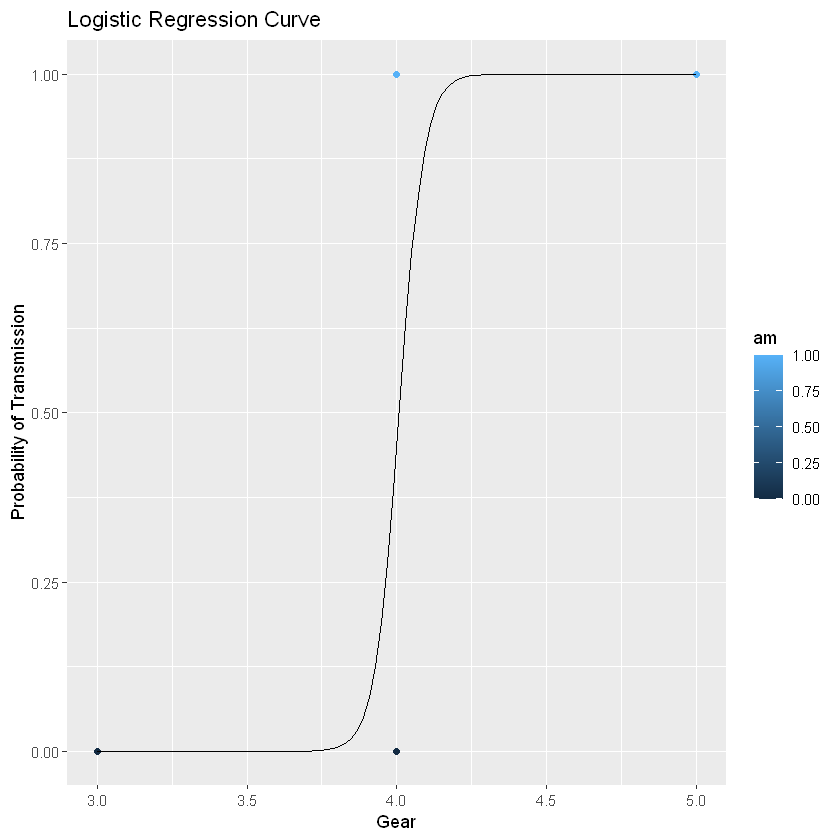

In [62]:
library(ggplot2)
ggplot(data = mtcars, aes(x = gear, y = am)) +
  geom_point(aes(color = am)) +
  geom_line(data = df, aes(x = x_seq, y = y_prob)) +
  labs(x = "Gear", y = "Probability of Transmission") +
  ggtitle("Logistic Regression Curve")

### Poisson Regression

In [63]:
library(MASS)
data(Insurance)
head(Insurance)


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




,District,Group,Age,Holders,Claims
,<fct>,<ord>,<ord>,<int>,<int>
1,1,<1l,<25,197,38
2,1,<1l,25-29,264,35
3,1,<1l,30-35,246,20
4,1,<1l,>35,1680,156
5,1,1-1.5l,<25,284,63
6,1,1-1.5l,25-29,536,84


In [64]:
model_poisson <- glm(Claims ~ Group + Age + Holders, data = Insurance, family = "poisson")
summary(model_poisson)


Call:
glm(formula = Claims ~ Group + Age + Holders, family = "poisson", 
    data = Insurance)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0968  -2.3838  -0.6682   1.0659   7.2631  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.2229509  0.0274553 117.389  < 2e-16 ***
Group.L     -0.2765726  0.0509129  -5.432 5.56e-08 ***
Group.Q     -0.6792883  0.0461971 -14.704  < 2e-16 ***
Group.C     -0.0455701  0.0367555  -1.240 0.215044    
Age.L        1.0421566  0.0550869  18.918  < 2e-16 ***
Age.Q        0.1940692  0.0512783   3.785 0.000154 ***
Age.C        0.2816197  0.0490350   5.743 9.29e-09 ***
Holders      0.0004778  0.0000241  19.826  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4236.68  on 63  degrees of freedom
Residual deviance:  538.69  on 56  degrees of freedom
AIC: 872.01

Number of Fisher Scoring iteration

In [65]:
predicted <- predict(model_poisson, newdata = Insurance[1:4], type = "response")

In [66]:
df_pois <- cbind(Insurance, predicted)

In [67]:
head(df_pois)

,District,Group,Age,Holders,Claims,predicted
,<fct>,<ord>,<ord>,<int>,<int>,<dbl>
1,1,<1l,<25,197,38,12.28179
2,1,<1l,25-29,264,35,21.41338
3,1,<1l,30-35,246,20,23.18834
4,1,<1l,>35,1680,156,114.53119
5,1,1-1.5l,<25,284,63,21.42436
6,1,1-1.5l,25-29,536,84,40.80568


In [68]:
mean(df_pois$predicted)

[1] 49.23438

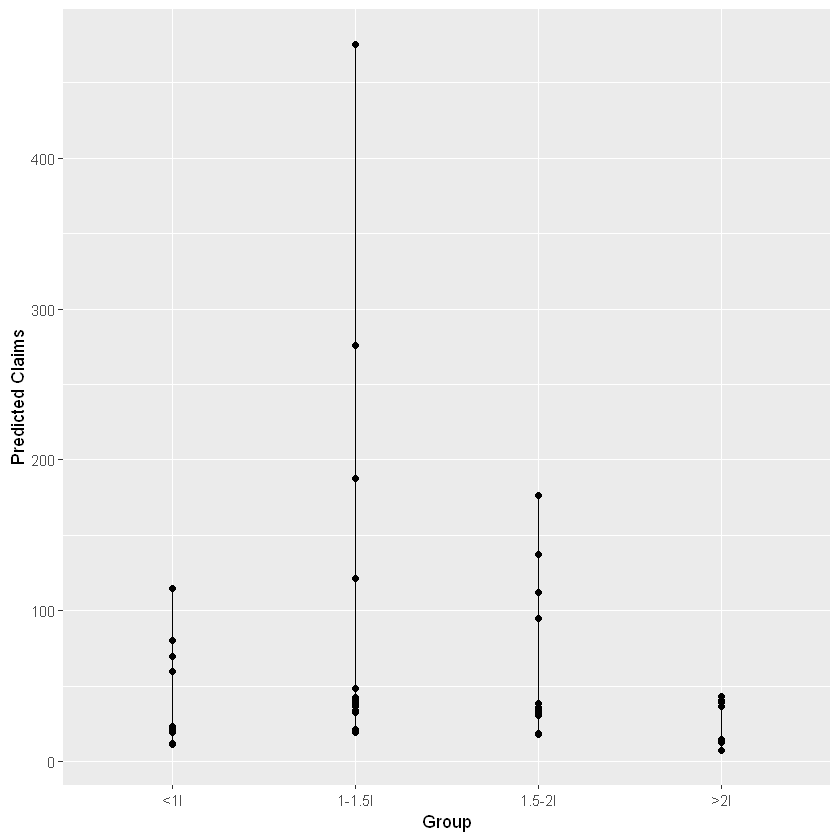

In [70]:
ggplot(df_pois, aes(x = Group, y = predicted)) +
  geom_point() +
  geom_line() +
  labs(x = "Group", y = "Predicted Claims")

### Confusion Matrix

In [81]:
library(ggplot2)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [83]:
# Make predictions
pred <- predict(model_logit, type = "response")

threshold <- 0.5
pred_class <- ifelse(pred > threshold, 1, 0)
conf_mat <- table(Actual = mtcars$mpg, Predicted = pred_class)
print(conf_mat)

      Predicted
Actual 0 1
  10.4 2 0
  13.3 1 0
  14.3 1 0
  14.7 1 0
  15   0 1
  15.2 2 0
  15.5 1 0
  15.8 0 1
  16.4 1 0
  17.3 1 0
  17.8 1 0
  18.1 1 0
  18.7 1 0
  19.2 2 0
  19.7 0 1
  21   0 2
  21.4 1 1
  21.5 1 0
  22.8 0 2
  24.4 0 1
  26   0 1
  27.3 0 1
  30.4 0 2
  32.4 0 1
  33.9 0 1


### Roc curve

In [109]:
library(pROC)
library(ggplot2)
library(mlbench)

In [111]:
data(warpbreaks)
head(warpbreaks)

,breaks,wool,tension
,<dbl>,<fct>,<fct>
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L


In [119]:
# Split the data into training and testing sets
set.seed(123)
trainIndex <- sample(nrow(warpbreaks), round(0.8 * nrow(warpbreaks)), replace='TRUE')
trainData <- warpbreaks[trainIndex, ]
testData <- warpbreaks[-trainIndex, ]

In [120]:
# Fit a logistic regression model on the training data
model <- glm(wool ~., data = trainData, family = "binomial")

In [121]:
# Make predictions on the testing data
pred <- predict(model, newdata = testData, type = "response")

In [122]:
# Create a ROC curve
roc <- roc(testData$wool, pred)

Setting levels: control = A, case = B

Setting direction: controls > cases



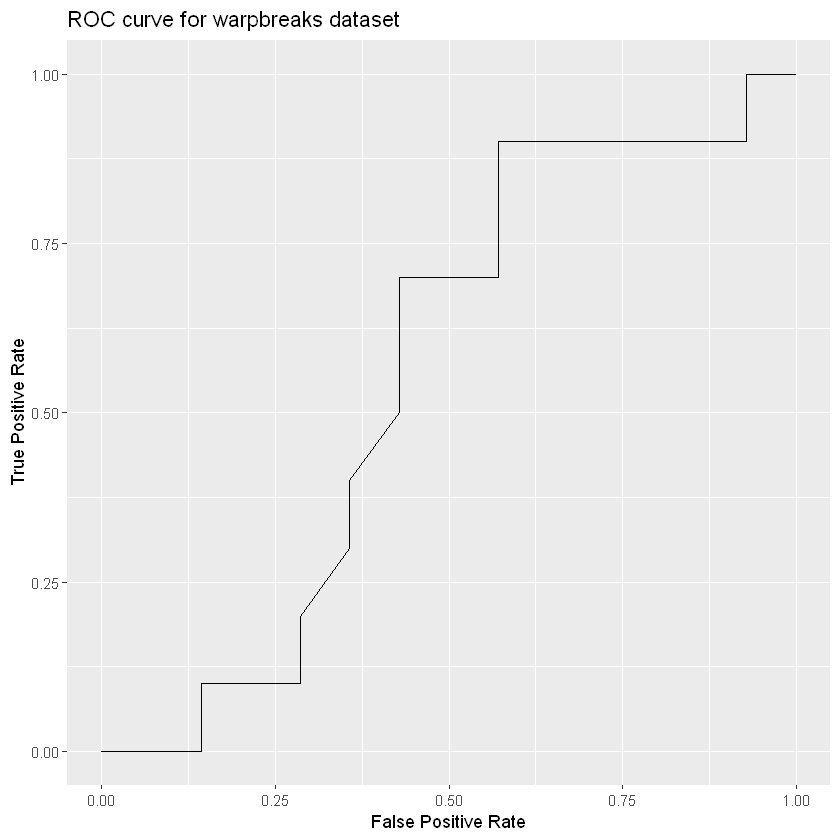

In [123]:
ggroc(roc, legacy.axes = TRUE)+
  ggtitle("ROC curve for warpbreaks dataset") +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")